In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,precision_score, recall_score,classification_report
from sklearn import tree

In [2]:
# loading data set
df=pd.read_csv("heart_failure.csv")
print(df.head(5))
# Checking for  missing values
print(df.isnull().sum())
# summary statics
print(df.describe())
print(df.shape)

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

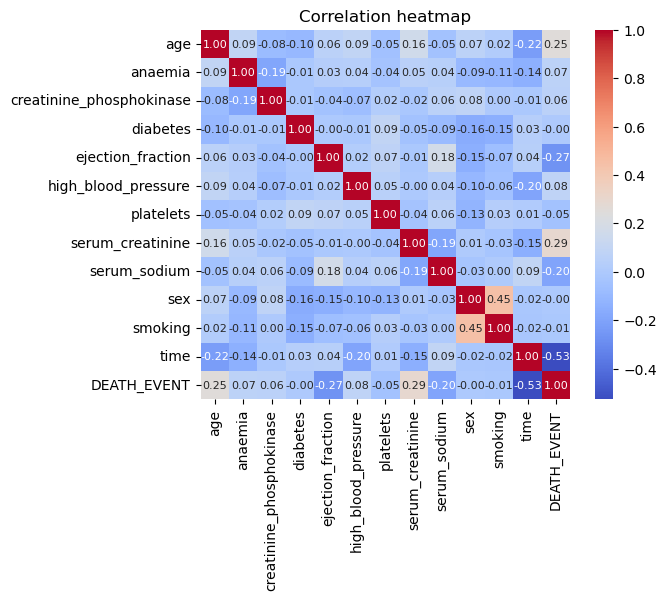

In [3]:
# Coorrelation analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,cbar=True, annot=True,square=True,annot_kws={'size':8},cmap='coolwarm',fmt=".2f")
plt.title('Correlation heatmap')
plt.show()


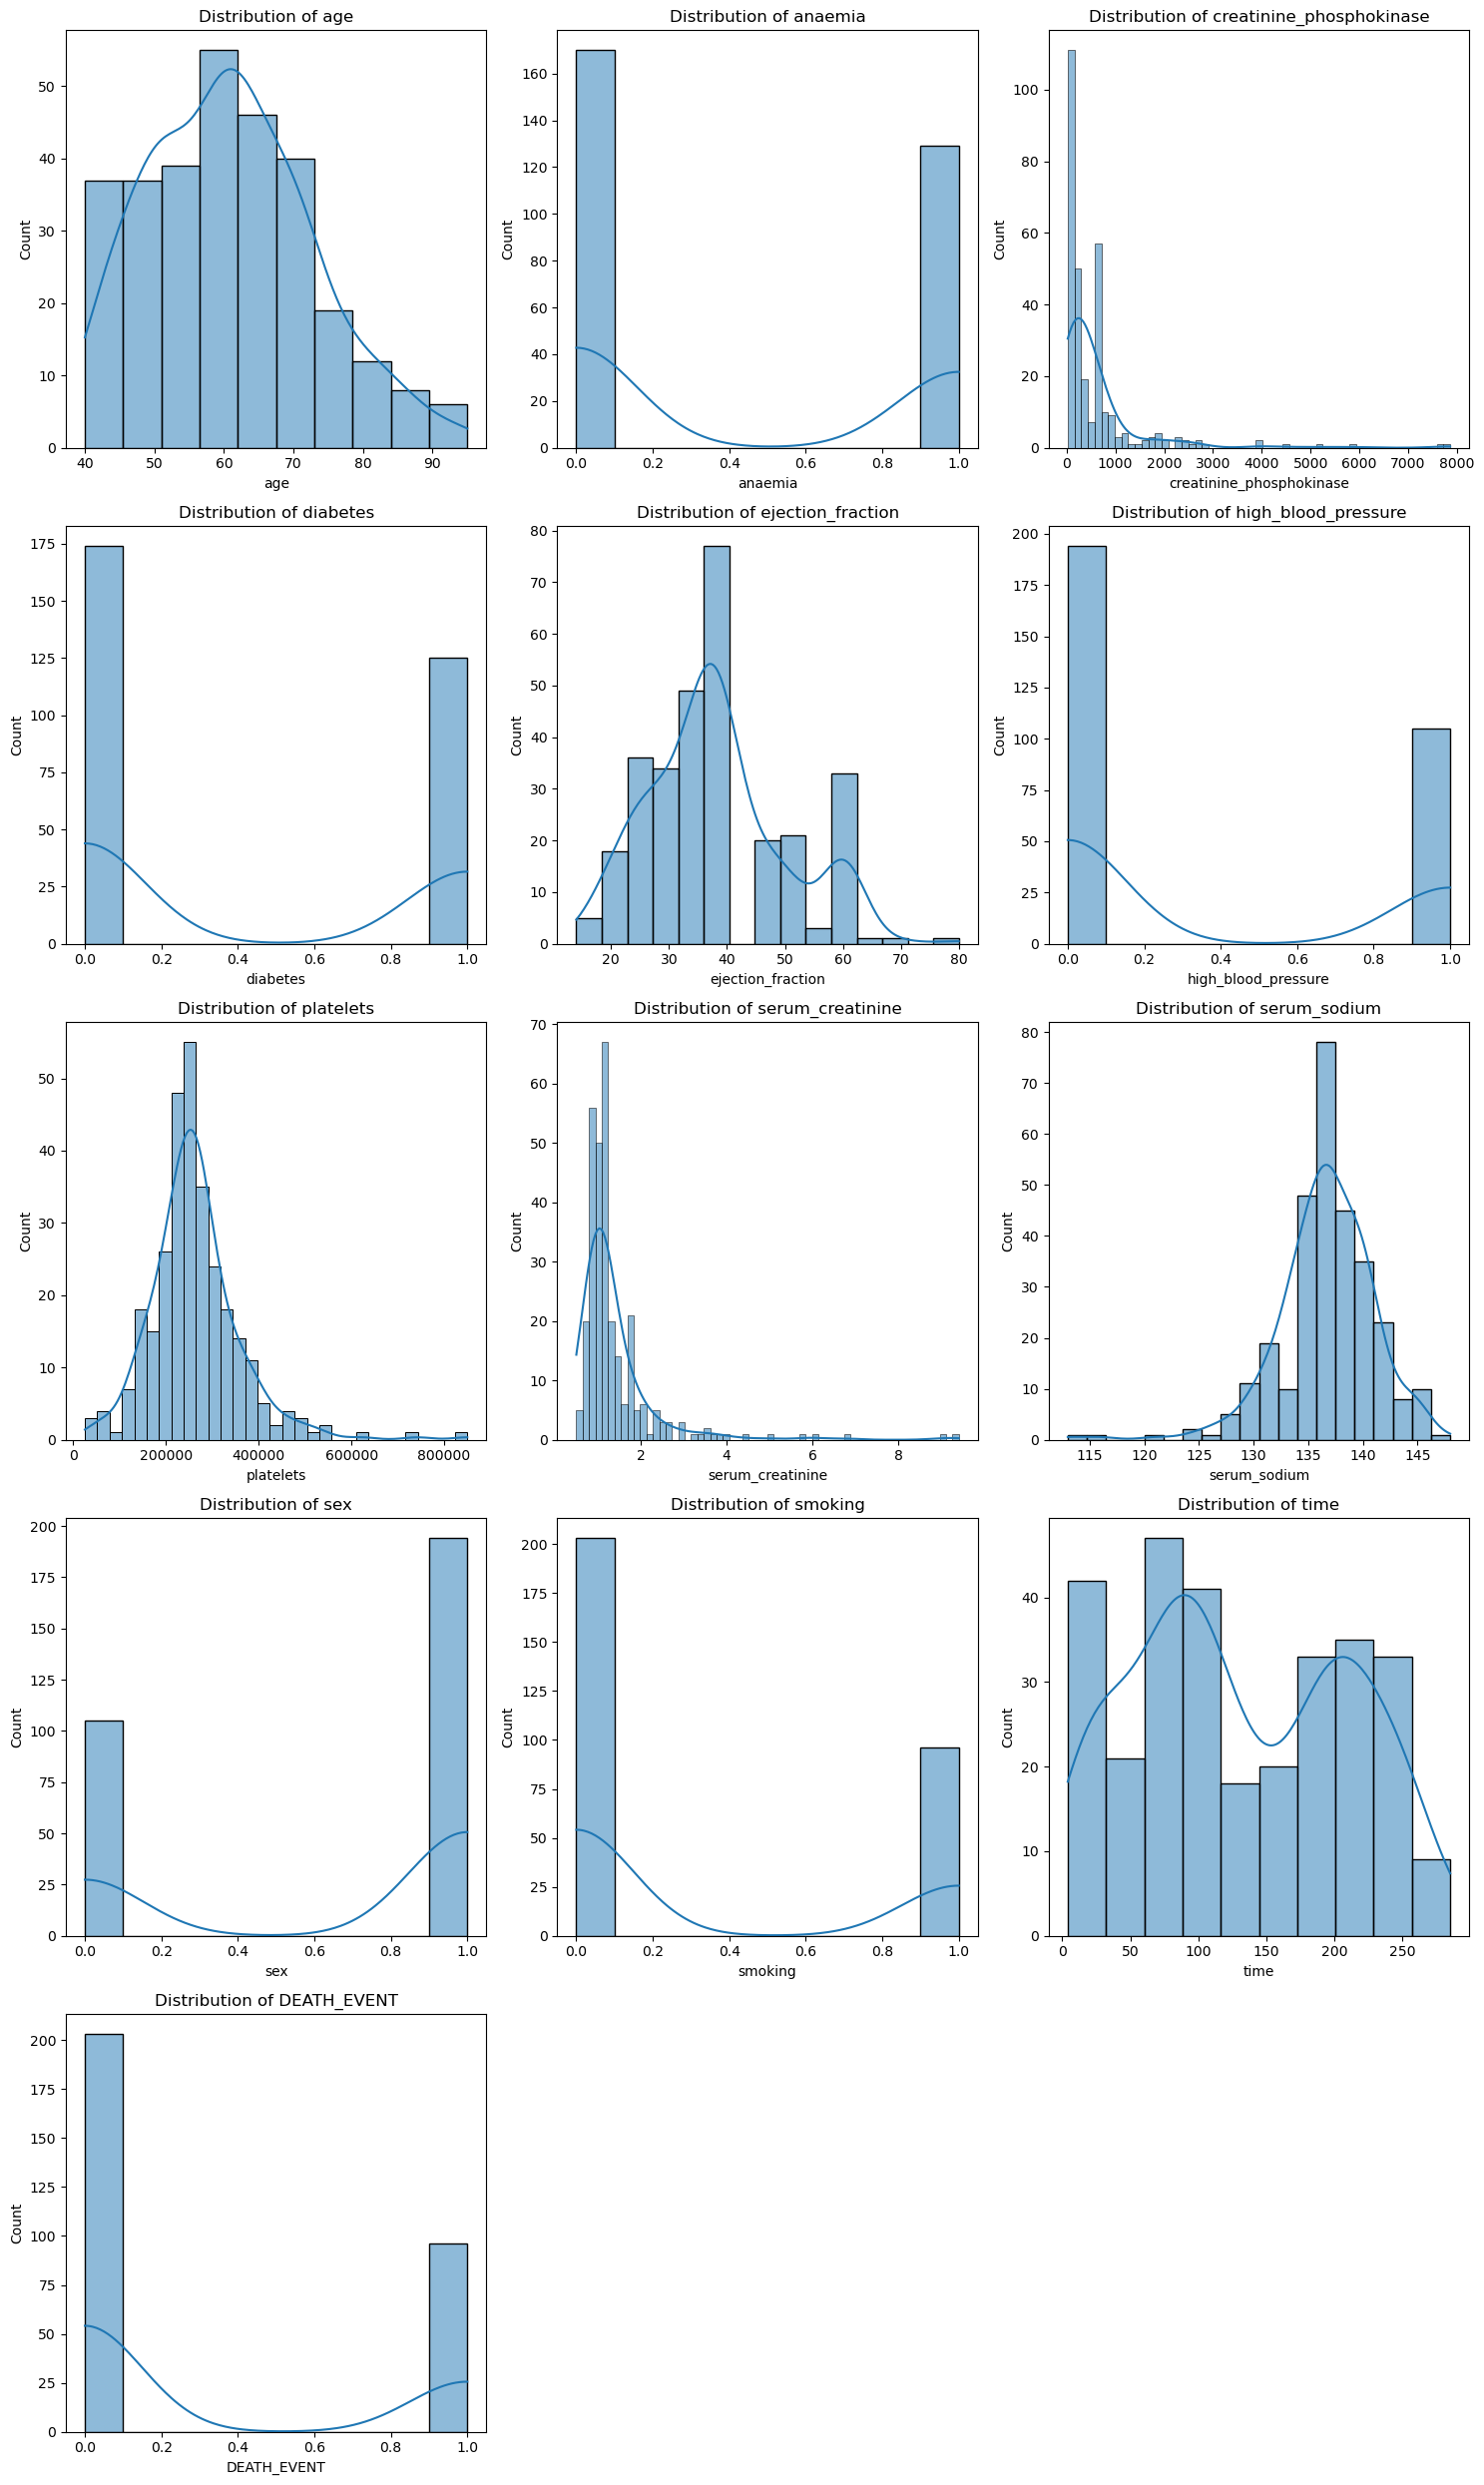

In [4]:
import math
# Number of features
num_features = len(df.columns)

# Determine the number of rows and columns for subplots 
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten in case the grid isn't perfectly rectangular

# Plot a histogram for each feature
for i, feature in enumerate(df.columns):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

# If there are any empty subplots, hide them
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [5]:
# Count the occurrences of each category in 'DEATH_EVENT'
death_event_counts = df['DEATH_EVENT'].value_counts()
# Define labels and colors
labels = [0, 1]  
colors= ['lightcoral', 'lightskyblue']

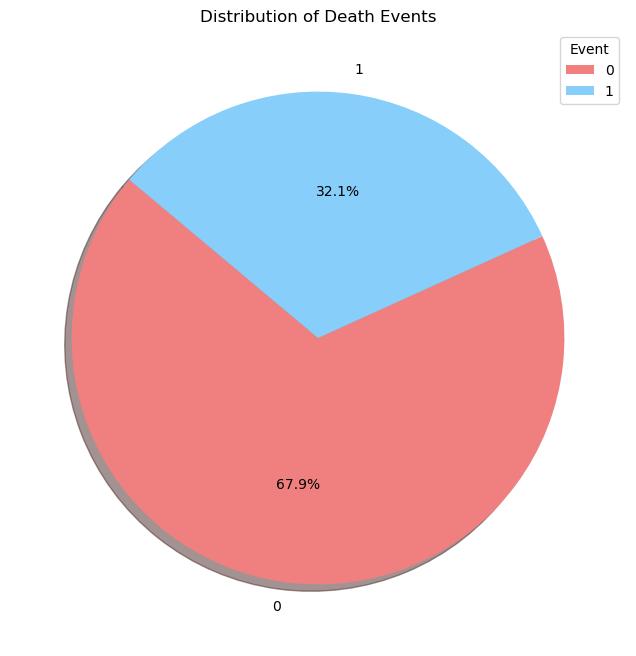

In [6]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(death_event_counts, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=140, shadow=True)
plt.legend(labels, title="Event", loc="best")
plt.title('Distribution of Death Events')
plt.show()

In [7]:
# feature Engineering
X=df.drop('DEATH_EVENT',axis=1)
Y=df['DEATH_EVENT']
print(X)
print(Y)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [8]:
# standardize the predictor features
scaler=StandardScaler()
scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(scaled,columns=X.columns)
print(X_scaled)

          age   anaemia  creatinine_phosphokinase  diabetes  \
0    1.192945 -0.871105                  0.000166 -0.847579   
1   -0.491279 -0.871105                  7.514640 -0.847579   
2    0.350833 -0.871105                 -0.449939 -0.847579   
3   -0.912335  1.147968                 -0.486071 -0.847579   
4    0.350833  1.147968                 -0.435486  1.179830   
..        ...       ...                       ...       ...   
294  0.098199 -0.871105                 -0.537688  1.179830   
295 -0.491279 -0.871105                  1.278215 -0.847579   
296 -1.333392 -0.871105                  1.525979  1.179830   
297 -1.333392 -0.871105                  1.890398 -0.847579   
298 -0.912335 -0.871105                 -0.398321 -0.847579   

     ejection_fraction  high_blood_pressure     platelets  serum_creatinine  \
0            -1.530560             1.359272  1.681648e-02          0.490057   
1            -0.007077            -0.735688  7.535660e-09         -0.284552   
2     

In [9]:
#split data into train test
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled, Y,  test_size=0.3,random_state=102)

In [10]:
# Fit the logistic regration
Logistic_regresion=LogisticRegression(solver='liblinear')
print(Logistic_regresion)
Logistic_regresion.fit(X_train,Y_train)
predicted=Logistic_regresion.predict(X_test)
print(predicted)


# Get predictions and predicted probabilities
#predicted_probabilities = Logistic_regresion.predict_proba(X_test)[:, 1]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test = X_test.reshape(-1, 1), c=predicted_probabilities, cmap='viridis', edgecolor='k', s=80)
plt.colorbar(label='Predicted Probability of Positive Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Predictions - Probability Visualization')
plt.show()

LogisticRegression(solver='liblinear')
[1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1]


AttributeError: 'DataFrame' object has no attribute 'reshape'

<Figure size 1000x600 with 0 Axes>

In [ ]:
class_report = classification_report(Y_test, predicted)
print(class_report)

In [ ]:
#print the modele evaluation metrics
print(confusion_matrix(Y_test, predicted))
print("Accuracy: ", accuracy_score(Y_test, predicted))
print("Precision:",precision_score(Y_test,predicted))
print("Recall:",recall_score(Y_test, predicted))
print("F1_score:",f1_score(Y_test,predicted))

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(Y_test, predicted)

# Plot the precision-recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [ ]:
save_model

# Coefficient Key Interpretation Points:


Positive Coefficient (𝛽𝑖>0): An increase in the feature leads to an increase in the log odds (which increases the probability of the positive class).
Negative Coefficient (𝛽𝑖<0): An increase in the feature leads to a decrease in the log odds (which decreases the probability of the positive class).
Magnitude of the Coefficient: The larger the absolute value of the coefficient, the stronger the association between that feature and the outcome. Small coefficients imply a weak association, while large coefficients imply a stronger association.

In [ ]:
#Fit the support vectore classifier
# with linear kernel
SVC=svm.SVC(kernel='linear')
SVC.fit(X_train,Y_train)
predicted=SVC.predict(X_test)
print(confusion_matrix(Y_test, predicted))
print("Accuracy: ", accuracy_score(Y_test, predicted))
print("Precision:",precision_score(Y_test,predicted))
print("Recall:",recall_score(Y_test, predicted))
print("F1_score:",f1_score(Y_test,predicted))
 

In [ ]:
# with poly kernel

SVC=svm.SVC(kernel='poly')
SVC.fit(X_train,Y_train)
predicted=SVC.predict(X_test)
print(confusion_matrix(Y_test, predicted))
print("Accuracy: ", accuracy_score(Y_test, predicted))
print("Precision:",precision_score(Y_test,predicted))
print("Recall:",recall_score(Y_test, predicted))
print("F1_score:",f1_score(Y_test,predicted))
 

In [ ]:
# with rbf kernel
SVC=svm.SVC(kernel='rbf')
SVC.fit(X_train,Y_train)
predicted=SVC.predict(X_test)
print(confusion_matrix(Y_test, predicted))
print("Accuracy: ", accuracy_score(Y_test, predicted))
print("Precision:",precision_score(Y_test,predicted))
print("Recall:",recall_score(Y_test, predicted))
print("F1_score:",f1_score(Y_test,predicted))

In [ ]:
# with sigmoid kernel

SVC=svm.SVC(kernel='sigmoid')
SVC.fit(X_train,Y_train)
predicted=SVC.predict(X_test)
print(confusion_matrix(Y_test, predicted))
print("Accuracy: ", accuracy_score(Y_test, predicted))
print("Precision:",precision_score(Y_test,predicted))
print("Recall:",recall_score(Y_test, predicted))
print("F1_score:",f1_score(Y_test,predicted))


In [ ]:
#Descision tree classifier

DT = DecisionTreeClassifier(random_state=42)
# Train the model
DT.fit(X_train, Y_train)
# Make predictions on the test set
Pred = DT.predict(X_test)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Pred))
print("Accuracy: ", accuracy_score(Y_test, Pred))
print("Precision:",precision_score(Y_test,Pred ))
print("Recall:",recall_score(Y_test, Pred))
print("F1_score:",f1_score(Y_test,Pred))

In [ ]:
#Fit RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, Y_train)
rf_predict = rf_clf.predict(X_test)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Pred))
print("Accuracy: ", accuracy_score(Y_test, rf_predict))
print("Precision:",precision_score(Y_test, rf_predict))
print("Recall:",recall_score(Y_test, rf_predict))
print("F1_score:",f1_score(Y_test,rf_predict))

In [ ]:
#fit KNeighborsClassifier Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
predicted_nn = knn.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Pred))
print("Accuracy: ", accuracy_score(Y_test, predicted_nn))
print("Precision:",precision_score(Y_test, predicted_nn))
print("Recall:",recall_score(Y_test, predicted_nn))
print("F1_score:",f1_score(Y_test,predicted_nn))

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Logistic_regresion, X_scaled, Y, cv=5)
print("Cross-validated scores:", scores)

plt.figure(figsize=(10,10),dpi=120)
tree.plot_tree(DT, 
               feature_names=X.columns.tolist(), 
               class_names=["0", "1"], 
               filled=True,
               rounded=True,
               fontsize=4)
plt.show()


In [ ]:
dataset.insert